In [1]:
# import system libraries
import sys
import os
import glob

# import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
from image_loader import dir_loader_stack
from image_loader import csv_loader_stack
from image_loader import image_plot
from image_loader import val_train_split



# Model classes
from resnet50 import Resnet50_pretrained

# Model helpers
from model_helpers import train
from model_helpers import predict
from model_helpers import plot_train_history


# torch temp
import torch.nn as nn
import torch.optim as optim
import torch

### Data From CSV Example

In [2]:
# Labels from CSV

df_lab = pd.read_csv('../datasets/animals/labels.csv')
df_lab.head()


,FilePath,Label
0,cats/cats_00072.jpg,cat
1,cats/cats_00073.jpg,cat
2,cats/cats_00074.jpg,cat
3,cats/cats_00075.jpg,cat
4,cats/cats_00076.jpg,cat


In [3]:
df_lab.Label = pd.Categorical(pd.factorize(df_lab.Label)[0])

In [4]:
df_lab.head()

,FilePath,Label
0,cats/cats_00072.jpg,0
1,cats/cats_00073.jpg,0
2,cats/cats_00074.jpg,0
3,cats/cats_00075.jpg,0
4,cats/cats_00076.jpg,0


In [5]:
df_lab.tail()

,FilePath,Label
2845,panda/panda_00996.jpg,2
2846,panda/panda_00997.jpg,2
2847,panda/panda_00998.jpg,2
2848,panda/panda_00999.jpg,2
2849,panda/panda_01000.jpg,2


In [6]:
df_lab.shape

(2850, 2)

In [7]:
# params

img_size = 244
batch_size = 32
num_workers = 0

# Dataset folder
data_dir = '../datasets/animals/'

# # Set subfolders for train, val & test
# train_dir = os.path.join(data_dir, 'train/')
# val_dir = os.path.join(data_dir, 'valid/')
# test_dir = os.path.join(data_dir, 'test/')

In [8]:
# train test split (Function)
# Train & val
# train_val_split(df, split)



In [9]:
train_df, val_df = val_train_split(df_lab, 0.2, True)

Train Shape: (2280, 2)
Validation Shape: (570, 2)
Training DataFrame 

                   FilePath Label
0       dogs/dogs_00062.jpg     1
1       cats/cats_00670.jpg     0
2     panda/panda_00827.jpg     2
3     panda/panda_00363.jpg     2
4       cats/cats_00861.jpg     0
...                     ...   ...
2275    dogs/dogs_00758.jpg     1
2276    dogs/dogs_00215.jpg     1
2277    dogs/dogs_00250.jpg     1
2278    dogs/dogs_00414.jpg     1
2279    cats/cats_00932.jpg     0

[2280 rows x 2 columns]

-----------------------

Validation DataFrame 

                  FilePath Label
0      dogs/dogs_00697.jpg     1
1      cats/cats_00396.jpg     0
2    panda/panda_00240.jpg     2
3      dogs/dogs_00937.jpg     1
4    panda/panda_00328.jpg     2
..                     ...   ...
565    cats/cats_00235.jpg     0
566  panda/panda_00524.jpg     2
567    cats/cats_00324.jpg     0
568    dogs/dogs_00903.jpg     1
569  panda/panda_00996.jpg     2

[570 rows x 2 columns]


In [10]:
train_df

,FilePath,Label
0,dogs/dogs_00062.jpg,1
1,cats/cats_00670.jpg,0
2,panda/panda_00827.jpg,2
3,panda/panda_00363.jpg,2
4,cats/cats_00861.jpg,0
...,...,...
2275,dogs/dogs_00758.jpg,1
2276,dogs/dogs_00215.jpg,1
2277,dogs/dogs_00250.jpg,1
2278,dogs/dogs_00414.jpg,1


In [11]:
val_df

,FilePath,Label
0,dogs/dogs_00697.jpg,1
1,cats/cats_00396.jpg,0
2,panda/panda_00240.jpg,2
3,dogs/dogs_00937.jpg,1
4,panda/panda_00328.jpg,2
...,...,...
565,cats/cats_00235.jpg,0
566,panda/panda_00524.jpg,2
567,cats/cats_00324.jpg,0
568,dogs/dogs_00903.jpg,1


In [12]:
train_loader = csv_loader_stack(data_dir,train_df, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,True)

val_loader = csv_loader_stack(data_dir,val_df, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,False)

# test_loader = NEED HOLDOUT SET


loaders = {
    'train':train_loader,
    'valid':val_loader,
    #'test':test_loader,
}

In [13]:
# images, labels = next(iter(train_loader))

# # Display image and label
# plt.imshow(images[0].permute(1, 2, 0))
# print(labels[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


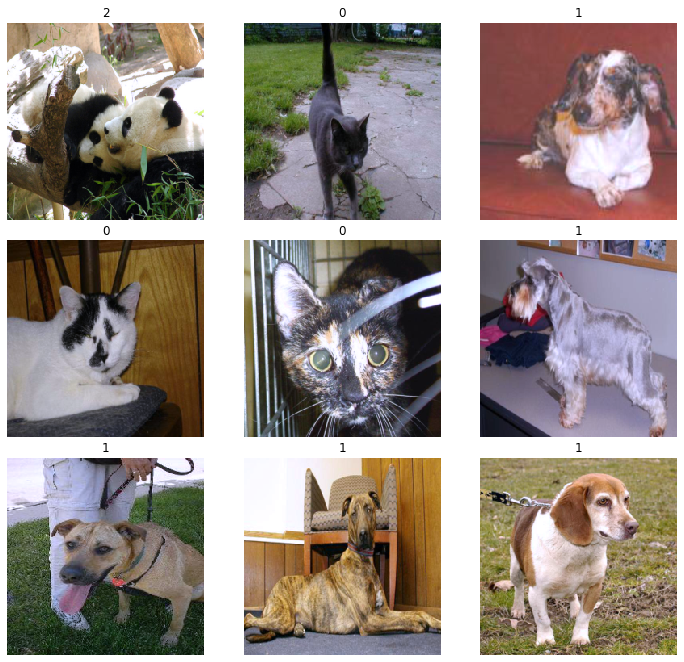

In [14]:
image_plot(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


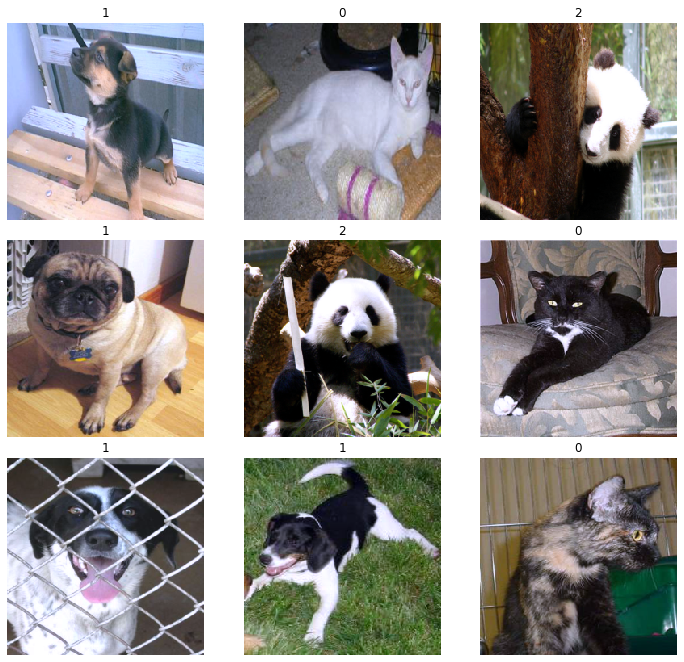

In [15]:
image_plot(val_loader)

### Create Model

In [16]:
# Model Parms

# Number Classes to predict
num_classes = 3

# Compute device (cuda = GPU)
device = 'cuda'

In [17]:
# create model from object

In [18]:
res_model = Resnet50_pretrained(num_classes)

In [19]:
# res_model = res_model.build()

### Train Model

In [20]:
# Train Params
n_epochs = 3
learn_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(res_model.model.fc.parameters(), lr=learn_rate)

device = 'cuda'
save_path = 'test_train.pt'

In [21]:
break

SyntaxError: 'break' outside loop (<ipython-input-21-6aaf1f276005>, line 4)

In [ ]:
H = train(res_model.model, n_epochs, loaders, optimizer,
                    criterion, device, save_path)

In [ ]:
# 

### Train Logs

In [ ]:
H

In [ ]:
plot_train_history(H,n_epochs)

### Save Model

In [ ]:
res_model.save('test_save_method2.pt')

### Load Model


In [ ]:
# TODO Create model method
res_model.load('test_save_method.pt',True)

### Test Model

In [ ]:
# get images image folder
images = glob.glob("images/*")

In [ ]:
for image in images:
    predict(res_model,image,device)